# Linear Regression


> _"Baseball statistics are like a girl in a bikini. They show a lot, but not everything."_   
    
> <a href="http://www.baseball-reference.com/players/h/harrato01.shtml" target="_blank">- Toby Harrah, former MLB baseball player</a>


<div style="align: center; text-align:center;">
    <img src=img/scorecard.jpg height="300px" width="500px" />
</div>

---

## Overview

The MLB has existed since 1869. Over the ~150 years since then, MLB general managers and statisticians have developed a vast assortment of metrics in an attempt to build baseball rosters with higher chances of succeeding.

In this notebook, I demonstrate usage of both univariate and multivariate linear regression (in Python) as a means for predicting specific outcomes -- specifically, __I examine how we can use various baseball metrics to predict the number of wins Major League Baseball (MLB) teams attain over the course of a 162-game season__.   

_As a disclaimer, this notebook is intended to demonstrate principles of linear regression in a baseball setting; it is not intended as a rigorous analysis of the ideal predictors to use in constructing a successful baseball team :)_

---

## Context

The MLB has existed since 1869. Over the ~150 years since then, MLB general managers and statisticians have developed a vast assortment of metrics in an attempt to build baseball rosters with higher chances of succeeding.

### Historical baseball analysis: Five tools

Historically, baseball talent scouts have relied on the <a href="https://en.wikipedia.org/wiki/Glossary_of_baseball_(0%E2%80%939)#5-tool_player" target="_blank">__ _five tools_ __</a> that positional baseball players (i.e., all players who are not pitchers) are said to possess as a measure of a player's ability. Those five tools include:   
- batting for average   
- batting for power  
- speed  
- defense with glove  
- defense with arm  

The higher a player ranks on each of these five tools, the more valuable you would expect that player to be to his team. The five tools are typically only applied to positional players, and are not commonly used to evaluate pitchers.




<div style="align: center; text-align:center;">
    <img src=img/kengriffey.png height="400px" width="400px" />
    <div class="caption" >_Ken Griffey Jr: The Ultimate 5-Tool Player_</div>
</div>

### Current baseball analysis: WAR

With recent advances in statistical techniques and the availability of robust baseball datasets (such as the [Lahman database](http://www.seanlahman.com/baseball-archive/statistics/)), statisticians have developed several metrics, or "<a href="http://sabr.org/sabermetrics" target="_blank">_sabermetrics_</a>," to better quantify the game of baseball. __Wins above replacement__ (WAR) and is one of the most popular sabermetrics. According to <a href="http://www.espn.com/blog/sweetspot/post/_/id/27050/what-we-talk-about-when-we-talk-about-war" target="_blank">ESPN</a>:

> It [WAR] attempts to evaluate a player's total contribution -- batting, fielding, baserunning, pitching -- to his team. It is expressed in terms of wins over the perceived value of a replacement-level player at each position, essentially a Triple-A player. (A team of replacement-level players would be expected to win about 50 games.)

In other words, a team composed of players with high-WAR values should be expected to attain more wins in a season than a team composed of players with low-WAR values. 

_Although WAR is calculated separately for positional players and pitchers; I focus on WAR for positional players in this notebook._    
  
<div style="align: center; text-align:center;">
    <img src=img/moneyball.jpg height="600px" width="200px" />
    <div class="caption" >_Moneyball -- both the book and the movie -- helped popularize sabermetrics_</div>
</div>

 

---

## Method

Linear regression is a common technique used for predicting continuous variables. _Univariate_ linear regression refers to regression models with only one predictor variable, whereas _multivariate_ linear regression refers to regression models with several predictor variables. I will compare a univariate regression model with one predictor, WAR, to a multivariate regression model with several predictors serving as proxies for the five tools listed above.

Because the five tools are typically only applied to positional players (and not pitchers), I  purposefully excluded pitching WAR from my univariate analysis.

### Data

Data for this analysis include data from the <a href="http://www.seanlahman.com/baseball-archive/statistics/" target="_blank">Lahman database</a> and <a href="http://www.fangraphs.com/" target="_blank">fangraphs.com</a>, and were cleaned and prepared in another notebook; please see [this notebook](INSERT LINK TO NOTEBOOK) for more information on how the variables listed below were collected.

In the dataset, each row represents a single team over one season of play. There are 30 MLB teams represented in the dataset ranging 31 years from 1986 - 2015.  

##### Outcome variable

Possible outcomes to consider for this analysis include whether or not a team made the playoffs and whether or not a team wins the World Series (i.e., MLB championship), but these are both binary (e.g., Yes/No) variables that would be best suited for a logistic regression model. I used number of wins as my outcome variable, since this is a continuous variable suited for linear regression.

* __Wins__: _the number of wins a specific MLB team attained in a given season_  

##### Predictor variables  
_Univariate analysis_: 
* __WAR__: the cumulative offensive and defensive WAR attained by a single team in a given season (does not include pitching WAR) 

_Multivariate analysis_:  
* __AVG__ (batting for average): _average hits per at bat_ (e.g., a .300 AVG means a team averaged 3 hits for every 10 at bats)  
* __ISO__ (batting for power): _isolated slugging percentage_, described by <a href="http://www.fangraphs.com/library/offense/iso" target="_blank">Fangraphs</a> as a "_measure of a hitter’s raw power_"
* __Spd__ (speed): _speed score_, described by <a href="http://www.fangraphs.com/library/offense/spd/" target="_blank">Fangraphs</a> as a rating of players on their "speed and baserunning ability" 
- __Def__ (defense with glove, defense with arm): _defensive runs above average_, a composite stat from <a href="http://www.fangraphs.com/library/defense/def/" target="_blank">Fangraphs</a> that assigns a single numerical value to player's defensive skills; I use this stat to represent both of the defensive five tools.



--- 

## Analysis & Code

#### Library & data import

I used the <a href="http://scikit-learn.org/" target="_blank">`scikit-learn`</a> library for my regression modeling. Import this and other data analysis / visualization libraries first.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows me to view plots in jupyter notebook
%matplotlib inline    

In [83]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Import and examine the data, which was prepared in another [Jupyter notebook](INSERT LINK HERE).

In [84]:
five = pd.read_csv('data/five_reg.csv')

In [86]:
five.describe()

,Year,AVG,ISO,WAR,Spd,Def,W,L
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,2000.937355,0.261816,0.148238,18.750232,4.536891,10.258005,79.883991,79.883991
std,8.562310,0.011924,0.021256,7.639580,0.508655,45.958911,11.867072,11.834338
min,1986.000000,0.226000,0.088000,-4.500000,3.000000,-160.900000,43.000000,40.000000
25%,1994.000000,0.253000,0.134000,13.425000,4.200000,-20.700000,71.250000,72.000000
50%,2001.000000,0.262000,0.147000,18.900000,4.500000,11.800000,80.000000,79.000000
75%,2008.000000,0.270000,0.163000,23.775000,4.900000,41.875000,89.000000,88.000000
max,2015.000000,0.294000,0.206000,44.400000,6.200000,141.000000,116.000000,119.000000


#### Prepare data

Next, I need to prepare my data by separating the predictors and outcome variables for the regression model.

In [108]:
preds = five[['AVG','ISO','Def','Spd']]    # multivariate predictors
war = five['WAR']    # univariate predictor
wins = five['W']    # outcome variable

#### Univariate: WAR

First, I will examine WAR as a predictor of wins alone using a univariate regression model. Next, I use tuple unpacking along with `train_test_split` from `scikit-learn` to create a _training_ dataset using 30% of the available data. I will train my linear model on this data before applying the model to the _test_ dataset, the remaining 70% of the data.

In [123]:
# use 30% of data for test set, set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(preds['AVG'], wins, test_size=0.3, random_state=101)

Now that I have separate test and training datasets, I can train a linear model on the test data using `LinearRegression()` and `.fit`.

In [124]:
lm = LinearRegression()

# use reshape(-1,1) to format data in way acceptable for lm.fit
lm.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Next, I can create an array of predictions for the outcome variable `wins` in the test dataset based on the `lm` regression model I just created. If my regression model is a perfect fit to the data, there will be no difference between my predicted `wins` values and the actual `wins` values.

In [125]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test.reshape(-1,1))

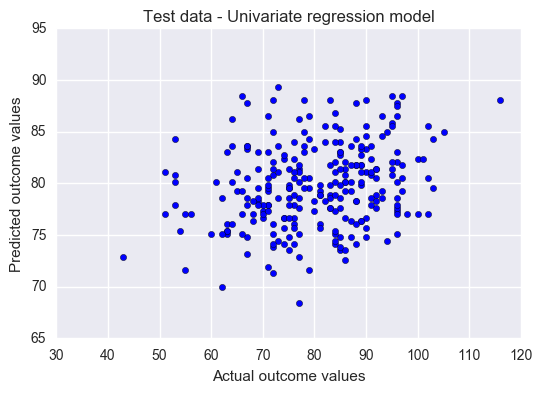

In [126]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.title('Test data - Univariate regression model')
plt.xlabel('Actual outcome values')
plt.ylabel('Predicted outcome values')

In [127]:
# view model metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

('MAE:', 9.4889325849853208)
('MSE:', 133.9971975397718)
('RMSE:', 11.575715854312069)
('R^2:', 0.24600984245213198)


In [128]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
coefficients = pd.DataFrame(lm.coef_,index=['war'])
coefficients.columns = ['Coefficient']
coefficients.sort('Coefficient',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
war,317.274178


#### Multivariate: 5 tools
--- 

In [129]:
# set params for model, use 30% of data for test set
X_train, X_test, y_train, y_test = train_test_split(preds, wins, test_size=0.3, random_state=101)

In [130]:
# train model
lm = LinearRegression()
# lm.fit(X_train,y_train)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test)

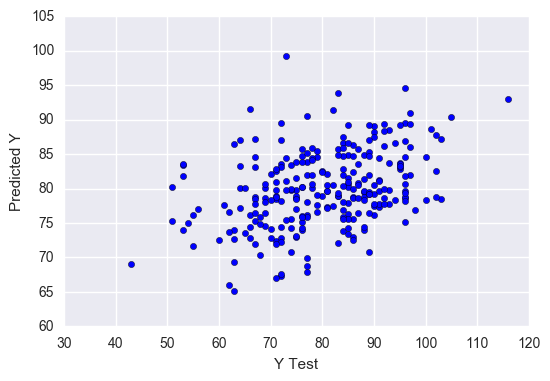

In [132]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [133]:
# view model metrics

metrics = 

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

SyntaxError: invalid syntax (<ipython-input-133-8da42b3df164>, line 3)

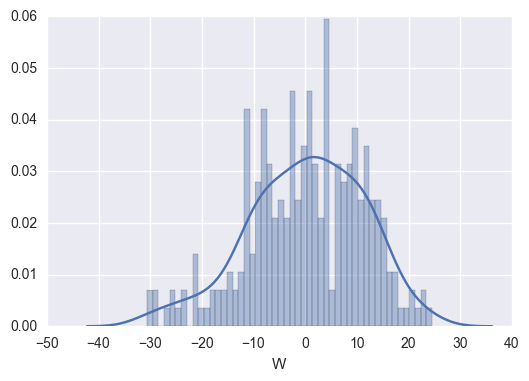

In [134]:
# plot residuals, should approximate normal distribution
sns.distplot((y_test-predictions),bins=50)

In [135]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
coefficients = pd.DataFrame(lm.coef_,preds.columns)
coefficients.columns = ['Coefficient']
coefficients.sort('Coefficient',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
AVG,224.586437
ISO,123.860515
Spd,1.849022
Def,0.054239


--- 
## Appendix

### Links 
<a href="https://en.wikipedia.org/wiki/Glossary_of_baseball_(0%E2%80%939)#5-tool_player" target="_blank">5 tool baseball player: wikipedia.com</a>

<a href="http://www.performancebaseball.net/html/5tools.html" target="_blank">5 tool baseball player: performancebaseball.net</a>

<a href="http://fivethirtyeight.com/features/the-toolsiest-player-of-them-all/" target="_blank">'Toolsiest player of them all': 538.com</a>

<a href="http://www.baseball-reference.com/about/war_explained.shtml" target="_blank">Baseball Reference WAR</a>

<a href="http://www.fangraphs.com/library/misc/war/" target="_blank">Fangraphs WAR</a>

<a href="https://en.wikipedia.org/wiki/Wins_Above_Replacement" target="_blank">Wikipedia WAR</a>

<a href="http://www.espn.com/blog/sweetspot/post/_/id/27050/what-we-talk-about-when-we-talk-about-war" target="_blank">ESPN WAR</a>